# Fonction de transfert du système bouclé

## Introduction

![Commande digitale](Images/Chapter3/digital_control.png)

La partie en grisée de ce schéma peut être vue comme la vue échantillonnée du *Système à commande* que possède *Algorithme*. D'un point de vue extérieur, ce système est discret car son entrée est la suite $\left\{u(kh)\right\}$ et sa sortie est la suite $\left\{y(kh)\right\}$.

La fonction de transfert reliant $\left\{u(kh)\right\}$ à $\left\{y(kh)\right\}$ est appelée fonction de transfert échantillonnée.

## Echantillonnage du système à commander

### Théorème 5.1

Supposons que le processus à commander analogique soit au repos, linéaire, causal et stationnaire; soit G(s) sa fonction de transfert. Alors la mise en série du convertisseur digital-analogique, du système à commander et du convertisseur analogique-digital est un processus discret décrit par la fonction de transfert discrète:

$$ G(z) = (1 - z^{-1}) \mathscr{Z}\left\{ \mathscr{L}^{-1} \left(\frac{G(s)}{s}\right) \right\}$$

Il est facile de démontrer cette formule en imposant, au point 2, un signal discret en forme d'échelon unité. Le signal discret au point 2 vaut donc:

$$ \left\{u(kh)\right\} = \{\dots, 0, \mathbf{1}, 1, 1, 1, \dots\} $$

dont la transformée en $z$ vaut:

$$ U(z) = \frac{z}{z-1} $$

Le passage à travers *D-A* en fait un échelon unité analogique dont la transformée de Laplace vaut $1/s$. Cette commande analogique est alors appliquée au *Système à commande* dont la fonction de transfert vaut $G(s)$, résultant en la sortie:

$$ Y(s) = \frac{G(s)}{s} $$

Ce dernier signal est ensuite discrétisé. Pour en déterminer la transformée en $z$, il faut d'abord transformer la sortie depuis le domaine de Laplace vers le domaine temporel, puis de prendre la transformée en $z$ de ce signal. Ce qui donne:

$$ Y(z) = \mathscr{Z} \left\{ \mathscr{L}^{-1} \left( \frac{G(s)}{s} \right) \right\} $$

La fonction de transfert totale étant donnée par la sortie sur l'entrée, on obtient:

$$ \frac{Y(z)}{U(z)} = \frac{\mathscr{Z} \left\{ \mathscr{L}^{-1} \left( \frac{G(s)}{s} \right) \right\}}{\frac{z}{z-1}} = (1-z^{-1}) \mathscr{Z} \left\{ \mathscr{L}^{-1} \left( \frac{G(s)}{s} \right) \right\} $$
***

En général, $G(s)$ contient:

- une description linéaire du processus autour du point de fonctionnement choisi
- le filtre de garde
- l'actionneur

Elle peut aussi contenir une description du capteur si ce dernier n'est pas négligeable.

#### Exercice

Déterminer la fonction de transfert discrète du système analogique suivant, lorsque la période d'échantillonnage vaut $h=0,025\:\mathrm{s}$:

$$ G(s) = \frac{4}{s(s+2)} $$

Réponse:

$$ G(z) = \frac{10^{-3} (1.23z + 1.21)}{z^2 - 1.95z + 0.95} $$
***

Lors de l'échantillonnage, soit du passage d'une fonction de transfert en $s$ vers une fonction de transfert en $z$, on remarque, grâce à la table des transformées, la relation suivante:

$$ z = e^{sh} $$

Les pôles de G(z) dépendent donc de la période d'échantillonnage !

#### Exemple

In [6]:
import math

h = 1  # modifier cette valeur pour voir la transformation

s = -2
z = math.exp(s*h)

print('Le pôle discret vaut: {}'.format(z))

Le pôle discret vaut: 0.1353352832366127


Au plus $h$ est petit, au plus $z$ tend vers 1; au plus $h$ est grand, au plus $z$ tend vers 0.
***

Cet exemple montre pourquoi il est important de tenir compte de l'échantillonnage le plus tôt possible dans la conception d'une boucle fermée.

Il est intéressant d'étudier plus en détail cette transformation. Tout d'abord, il est à remarquer que la fonction est périodique de période $\omega_e$:

$$ e^{(s+j\omega_e)h} = e^{sh}e^{j\omega_e h} = e^{sh}e^{j2\pi} = e^{sh} $$

car $\omega_e = \frac{2\pi}{h}$

La fonction peut donc être étudiée dans la région $-\omega_e/2 = -\omega_N \leq \mathrm{IM} s < \omega_e/2 = \omega_N$.

On pose:

$$ s = \sigma + j\omega \qquad \omega \in [-\omega_N, \omega_N] $$

Son image dans le domaine $z$ est:

$$ z = e^{sh} = e^{\sigma h}e^{j\omega h} $$

Utilisons le code suivant pour visualiser la transformation du plan $s$ vers le plan $z$. Testons successivement les cas suivants:

- $\sigma = 0 \; \text{et} \; \omega \in [-\omega_N, \omega_N]$
- $\sigma = c \; \text{et} \; \omega \in [-\omega_N, \omega_N]$
- $\sigma \in [0, c_2] \; \text{et} \; \omega \in [-\omega_N, \omega_N]$
- $\sigma \in [c_1, c_2] \; \text{et} \; \omega \in [-\omega_N, \omega_N]$

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('../my_params.mplstyle')

In [8]:
def sign(x):
    return x / abs(x)

def plot_ax1():    
    ax1 = plt.subplot(121)
    ax1.plot(sigma, omega, '-', label='s plane')
    ax1.plot(limit, omega_n, '-', color='steelblue')
    ax1.plot(limit, omega_p, '-', color='steelblue')
    ax1.set_xticks([limit[0], 0, -limit[0]])
    ax1.set_xticklabels([r'-$\infty$', 0, r'$\infty$'])
    ax1.set_yticks([omega[0], 0, omega[-1]])
    ax1.set_yticklabels([r'-$\omega_N$', 0, r'$\omega_N$'])
    ax1.set_xlabel('Re')
    ax1.set_ylabel('Im')
    ax1.legend()

def plot_ax2():
    ax2 = plt.subplot(122, projection='polar')
    ax2.plot(phase_z, magn_z, label='z plane')
    ax2.set_rticks([0, 1])
    ax2.legend(loc=8)

In [9]:
h = 0.025
omega_N = math.pi / h

c1 = -50  # changer cette valeur (c1 < c2)
c2 = -70  # changer cette valeur

sigma = [
    abs(i) * c2 / 100 
    if abs(i) * c2 / 100 <= c1 else c1 
    for i in range(-101, 101)
]
omega = [i * omega_N / 100 for i in range(-101, 101)]

limit = [i for i in range(2*c2 if not c2 == 0 else -50, c2)]
omega_n = [omega[0] for i in range(2*c2 if not c2 == 0 else -50, c2)]
omega_p = [omega[-1] for i in range(2*c2 if not c2 == 0 else -50, c2)]

magn_z = [math.exp(s*h) for s in sigma]
phase_z = [o * h for o in omega]

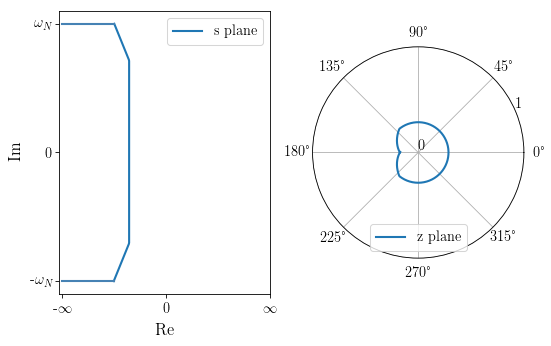

In [10]:
plot_ax1()
plot_ax2()

## Fonction de transfert du système bouclé

Le système en boucle fermée peut être décrit par le schéma fonctionnel ci-dessous:

![](Images/Chapter5/control_loop.png)

Sur ce schéma, on retrouve:

- la consigne $Y_c(z)$ contenue dans l'algorithme
- le régulateur $K(z)$
- le convertisseur $D-A$ transformant la commande numérique $U(z)$ en commande analogique
- la perturbation $W(s)$
- le système à commander, décrit par la fonction de transfert $G(s)$
- le convertisseur $A-D$ transformant la sortie du système en sortie discrète $Y(z)$ 

On peut définir, comme pour les systèmes analogiques, les problèmes d'asservissement et de régulation:

- en annulant $Y_c(z)$, le système doit rejeter la perturbation $W(s)$; c'est le problème de régulation
- en annulant $W(s)$, le système doit poursuivre la consigne $Y_c(z)$; c'est le problème d'asservissement

Seulement, ce schéma fait intervenir des éléments de différentes natures. On y retrouve des signaux discrets, des signaux continus et des convertisseurs $A-D$ et $D-A$.

En émettant l'hypothèse que la perturbation $W(s)$ est lente, et en considérant $G(z) = (1-z^{-1})\mathscr{Z}\left\{\mathscr{L}^{-1}(\frac{G(s)}{s})\right\}$, la transformée en $z$ reliant $Y(z)$ à $U(z)$ lorsque la perturbation est nulle, on retrouve le schéma fonctionnel suivant, en ajoutant le bruit de mesure $V(z)$.

![](Images/Chapter5/control_loop_noise.png)

En considérant les entrées $Y_c(z)$, $W(z)$ et $V(z)$ et les signaux $Y'(z)$, $E(z)$ et $U'(z)$, on obtient les fonctions de transfert suivantes:

$$ \begin{bmatrix}
     Y'(z) \\ E(z) \\ U'(z)
   \end{bmatrix}
   = \frac{1}{1+K(z)G(z)}
   \begin{bmatrix}
     K(z)G(z) & G(z) & 1 \\
     1 & -G(z) & -1 \\
     K(z) & 1 & -K(z)
   \end{bmatrix}
   \begin{bmatrix}
     Y_c(z) \\ W(z) \\ V(z)
   \end{bmatrix}
$$

Parmi ces fonctions de transfert, 2 d'entres elles portent un nom spécifique au vu de leur importance.

#### Définition

La fonction de transfert suivante est appelée fonction de sensibilité:

$$ S(z) = \frac{1}{1+K(z)G(z)} $$

La fonction de transfert suivante est appelée fonction de sensibilité complémentaire:

$$ T(z) = \frac{K(z)G(z)}{1+K(z)G(z)} $$

En passant, on remarque les relations suivantes:

$$ S(z) = \frac{E(z)}{Y_c(z)} = \frac{U'(z)}{W(z)} = \frac{Y'(z)}{V(z)} = -\frac{E(z)}{V(z)} $$

$$ T(z) = \frac{Y(z)}{Y_c(z)} = -\frac{U(z)}{W(z)} = -\frac{Y(z)}{V(z)} $$

Ces 2 fonctions de transfert sont liées par la relation suivante, ayant de grosses conséquences obligeant à trouver des compromis:

$$ S(z) + T(z) = \frac{1}{1+K(z)G(z)} + \frac{K(z)G(z)}{1+K(z)G(z)} = 1 $$

Dans la relation matricielle vue plus haut, on retrouve 4 fonctions de transfert différentes:

$$ \frac{K(z)G(z)}{1+K(z)G(z)} \qquad \frac{1}{1+K(z)G(z)} \qquad \frac{G(z)}{1+K(z)G(z)} \qquad \frac{K(z)}{1+K(z)G(z)} $$

Ces fonctions de transfert permettent de déterminer n'importe quel relation entrée-sortie du système en boucle fermée. Elles sont souvent référencées comme le *gang des quatre*.

Ce qu'il faut en retenir principalement est que, lors de la synthèse d'un régulateur pour un problème d'asservissement, on est souvent tenté de simplifier un pôle de $G(z)$ par un zéro de $K(z)$. En supposant que cette simplification soit parfaite, on pourrait simplifier un pôle instable de $G(z)$, ce qui permettrait de stabiliser un système instable. Cependant, si une perturbation intervient, la fonction de transfert liant $Y(z)$ à $W(z)$, qui s'écrit

$$ \frac{Y(z)}{W(z)} = \frac{G(z)}{1+K(z)G(z)} $$

contiendra toujours le pôle instable, même en boucle fermée. Le système sera donc stable tant qu'aucune perturbation ne survient. Sinon il redeviendra instable.